<a href="https://colab.research.google.com/github/lamide-xxx/gender-classifier/blob/main/mole_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount Google Drive on Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Upload Kagle API json file
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"olamideabegunde1","key":"863ad9dff062891206f376d6e8ec7c60"}'}

In [4]:
#Install Kaggle API and create necessary folder path
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp "kaggle.json" ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/"kaggle.json"  # set permission

kaggle.json


In [5]:
# Create directory to save data
!mkdir /content/drive/MyDrive/'Colab Notebooks'/data/mole-classification
# download the data using Kaggle API
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign -p /content/drive/MyDrive/Colab\ Notebooks/data/mole-classification



 96% 312M/325M [00:02<00:00, 131MB/s]
100% 325M/325M [00:02<00:00, 140MB/s]


In [6]:
# Change the directory and unzip it
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/data/mole-classification')  #change dir
!unzip -o skin-cancer-malignant-vs-benign.zip -d .  #unzip data, a folder train/ will be created


Streaming output truncated to the last 5000 lines.
  inflating: ./data/train/benign/420.jpg  
  inflating: ./data/train/benign/421.jpg  
  inflating: ./data/train/benign/422.jpg  
  inflating: ./data/train/benign/423.jpg  
  inflating: ./data/train/benign/424.jpg  
  inflating: ./data/train/benign/425.jpg  
  inflating: ./data/train/benign/426.jpg  
  inflating: ./data/train/benign/429.jpg  
  inflating: ./data/train/benign/43.jpg  
  inflating: ./data/train/benign/430.jpg  
  inflating: ./data/train/benign/431.jpg  
  inflating: ./data/train/benign/432.jpg  
  inflating: ./data/train/benign/434.jpg  
  inflating: ./data/train/benign/435.jpg  
  inflating: ./data/train/benign/438.jpg  
  inflating: ./data/train/benign/439.jpg  
  inflating: ./data/train/benign/440.jpg  
  inflating: ./data/train/benign/441.jpg  
  inflating: ./data/train/benign/442.jpg  
  inflating: ./data/train/benign/443.jpg  
  inflating: ./data/train/benign/445.jpg  
  inflating: ./data/train/benign/446.jpg  
  in

In [4]:
# Check how many files there are for training and validation.
import os
folder = '/content/drive/MyDrive/Colab Notebooks/data/mole-classification/data/train/benign'
num_files_train_ben = len([f for f in os.listdir(folder)if os.path.isfile(os.path.join(folder, f))])

folder = '/content/drive/MyDrive/Colab Notebooks/data/mole-classification/data/train/malignant'
num_files_train_mal = len([f for f in os.listdir(folder)if os.path.isfile(os.path.join(folder, f))])

folder = '/content/drive/MyDrive/Colab Notebooks/data/mole-classification/data/val/benign'
num_files_val_ben = len([f for f in os.listdir(folder)if os.path.isfile(os.path.join(folder, f))])

folder = '/content/drive/MyDrive/Colab Notebooks/data/mole-classification/data/val/malignant'
num_files_val_mal = len([f for f in os.listdir(folder)if os.path.isfile(os.path.join(folder, f))])


n_files_train = num_files_train_ben + num_files_train_mal
n_files_val = num_files_val_ben + num_files_val_mal


print("num of files in train/:%d" % (n_files_train)) 
print("num of files in val/:%d" % (n_files_val)) 


num of files in train/:2170
num of files in val/:467


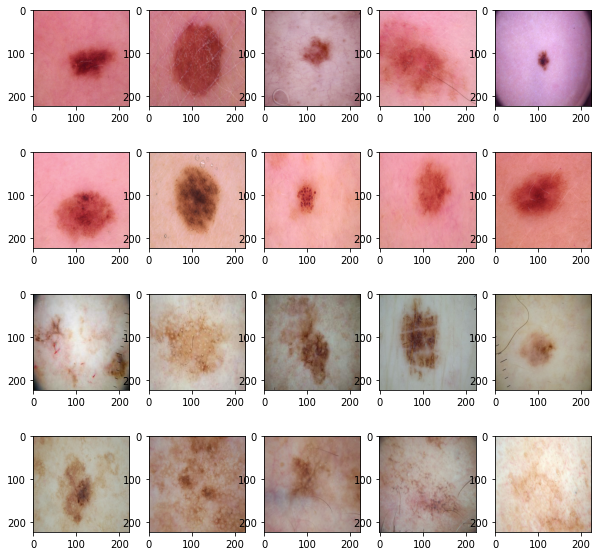

In [31]:
#Visualize some images
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Colab Notebooks/data/mole-classification/data/train/'
plt.figure(figsize=(10,10))


fileno = 1000
plot = 1
while plot <= 10: 
    filename = folder + 'benign/' + str(fileno) + '.jpg'
    if not os.path.exists(filename):
      fileno +=1
      continue
    else:
      plt.subplot(4,5,plot)
      image = imread(filename)
      plt.imshow(image)
      fileno +=1
      plot += 1

fileno = 1
plot = 1
while plot <= 10: 
     filename = folder + 'malignant/' + str(fileno) + '.jpg'
     if not os.path.exists(filename):
       fileno +=1
       continue
     else:
       plt.subplot(4,5,plot+10)
       image = imread(filename)
       plt.imshow(image)
       fileno +=1
       plot += 1

plt.show()

In [74]:
# Get the image size
image = imread('/content/drive/MyDrive/Colab Notebooks/data/mole-classification/data/val/benign/100.jpg')
print (image.shape)

(224, 224, 3)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

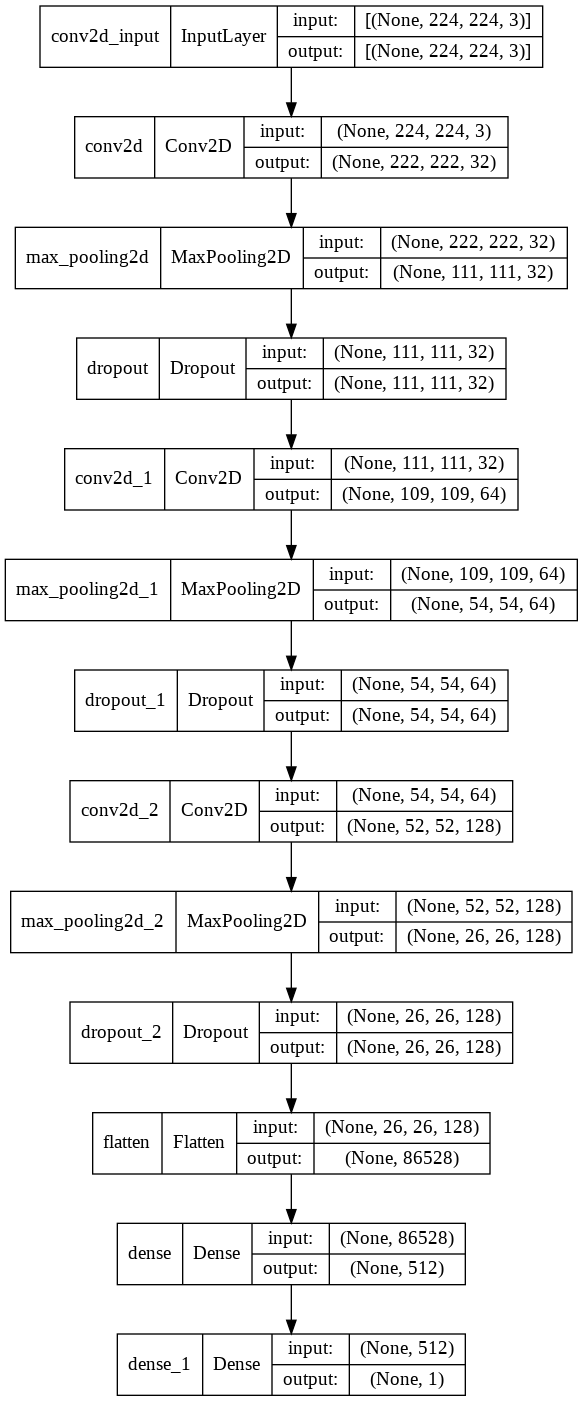

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

#Create a sequental CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',kernel_regularizer = 'l2', input_shape=(224,224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_regularizer = 'l2'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer = 'l2'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True) # visualize the CNN artitecture

In [6]:
#Compile model

model.compile(loss='binary_crossentropy',
            optimizer='adam',#adam (with default parameters) is always a good choice 
            metrics=['accuracy'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# Creating Image data generators. Data augmentation is
# applied to the training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/drive/MyDrive/Colab Notebooks/data/mole-classification/data/train/'
val_dir = '/content/drive/MyDrive/Colab Notebooks/data/mole-classification/data/val/'

batch_size = 32
# this is a generator that will read pictures found in
# subfolders of training data, and indefinitely generate
# batches of training image data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),# all images will be resized to 150x150
    batch_size=batch_size,
    class_mode='binary')# since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size=batch_size,
    class_mode='binary')

Found 2170 images belonging to 2 classes.
Found 467 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/150
67/67 [==============================] - 796s 12s/step - loss: 1.9225 - accuracy: 0.5884 - val_loss: 1.3383 - val_accuracy: 0.5536
Epoch 2/150
67/67 [==============================] - 30s 454ms/step - loss: 1.1471 - accuracy: 0.7217 - val_loss: 1.0310 - val_accuracy: 0.7589
Epoch 3/150
67/67 [==============================] - 30s 443ms/step - loss: 0.9561 - accuracy: 0.7549 - val_loss: 0.8713 - val_accuracy: 0.8036
Epoch 4/150
67/67 [==============================] - 30s 449ms/step - loss: 0.8440 - accuracy: 0.7727 - val_loss: 0.7948 - val_accuracy: 0.7589
Epoch 5/150
67/67 [==============================] - 30s 445ms/step - loss: 0.7680 - accuracy: 0.7820 - val_loss: 0.7938 - val_accuracy: 0.7344
Epoch 6/150
67/67 [==============================] - 30s 443ms/step - loss: 0.7049 - accuracy: 0.7839 - val_loss: 0.6373 - val_accuracy: 0.8259
Epoch 7/150
67/67 [==============================] - 30s 447ms/step - loss: 0.6634 - accuracy: 0.7792 - val_loss: 0.6653 - val_accuracy: 

Text(0.5, 0, 'epoch')

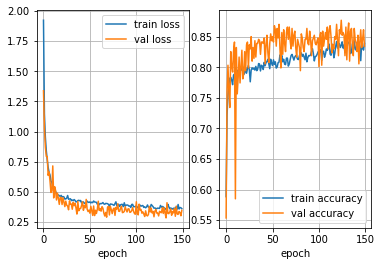

In [8]:
#Training the model on 150 epochs

history=model.fit_generator(
        train_generator,
        steps_per_epoch = n_files_train// batch_size,
        epochs=150,
        validation_data=val_generator,
        validation_steps= n_files_val // batch_size)
model_folder = '/content/drive/MyDrive/Colab Notebooks/models'
import os
if not os.path.exists(model_folder):
    os.mkdir(model_folder)
model.save(model_folder+'/gender_classification.h5')  # always save your model after training

# plot the learning curves
import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
#plt.ylim([0,1.0])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
#plt.ylim([0,1.0])
plt.xlabel('epoch')

In [18]:
#Testing the model

test_dir = '/content/drive/MyDrive/Colab Notebooks/data/mole-classification/data/test/'
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size=batch_size,
    class_mode='binary')

t_loss,t_acc = model.evaluate(test_gen)


Found 660 images belonging to 2 classes.
21/21 [==============================] - 2s 115ms/step - loss: 0.3591 - accuracy: 0.8439
